In [ ]:
# dataset
import pandas as pd
import numpy as np

df = pd.read_csv('heart_2020_cleaned.csv')

# Split data into features (X) and labels (y)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
print(X)

         BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0      16.60     Yes              No     No             3.0          30.0   
1      20.34      No              No    Yes             0.0           0.0   
2      26.58     Yes              No     No            20.0          30.0   
3      24.21      No              No     No             0.0           0.0   
4      23.71      No              No     No            28.0           0.0   
...      ...     ...             ...    ...             ...           ...   
79644  38.65      No              No     No             0.0          10.0   
79645  29.76     Yes              No     No             4.0           0.0   
79646  33.23     Yes              No     No             0.0           0.0   
79647  31.75     Yes              No     No             0.0          27.0   
79648  27.32     Yes             Yes     No             0.0           0.0   

      DiffWalking     Sex  AgeCategory   Race Diabetic PhysicalActivity  \


In [ ]:
print(y)

0         No
1         No
2         No
3         No
4         No
        ... 
79644     No
79645    Yes
79646     No
79647     No
79648     No
Name: HeartDisease, Length: 79649, dtype: object


In [ ]:
# Check for NaN values in X
nan_rows = X[X.isnull().any(axis=1)]

# Print rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

# Remove rows with NaN values from X
X = X.dropna()

# Reset index after dropping rows
X = X.reset_index(drop=True)

#drop corresponding y values which had nan in X
y = y.drop(nan_rows.index)
y = y.reset_index(drop=True)

Rows with NaN values:
         BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
79648  27.32     Yes             Yes     No             0.0           0.0   

      DiffWalking   Sex AgeCategory Race Diabetic PhysicalActivity GenHealth  \
79648          No  Male          70  NaN      NaN              NaN       NaN   

       SleepTime Asthma KidneyDisease SkinCancer  
79648        NaN    NaN           NaN        NaN  


In [ ]:
# Check for NaN values in features (X)
nan_values_X = X.isnull().sum()
print("NaN values in features (X):")
print(nan_values_X)

NaN values in features (X):
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
# Check for NaN values in labels (y)
nan_values_y = y.isnull().sum()
print("\nNaN values in labels (y):")
print(nan_values_y)


NaN values in labels (y):
0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Specify the column names to be one-hot encoded
columns_to_encode = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

# Create the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Apply the transformation to the selected columns
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[ 0.  1.  1. ...  3. 30.  5.]
 [ 1.  0.  1. ...  0.  0.  7.]
 [ 0.  1.  1. ... 20. 30.  8.]
 ...
 [ 0.  1.  1. ...  4.  0.  6.]
 [ 0.  1.  1. ...  0.  0.  6.]
 [ 0.  1.  1. ...  0. 27.  4.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 ... 1 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[-1.18400068  1.18400068  0.27102051 ... -0.06230488  3.27686329
  -1.40355823]
 [ 0.84459411 -0.84459411  0.27102051 ... -0.43370009 -0.49125005
  -0.06799552]
 [-1.18400068  1.18400068  0.27102051 ...  2.04226797  3.27686329
   0.59978584]
 ...
 [-1.18400068  1.18400068  0.27102051 ...  0.06149352 -0.49125005
  -0.73577687]
 [-1.18400068  1.18400068  0.27102051 ... -0.43370009 -0.49125005
  -0.73577687]
 [-1.18400068  1.18400068  0.27102051 ... -0.43370009  2.90005195
  -2.07133959]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# ANN

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(17, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout with a 50% drop rate (adjust as needed)
    layers.Dense(34, activation='relu'),
    Dropout(0.2),  # Dropout with a 50% drop rate (adjust as needed)
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if y is one-hot encoded
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
1992/1992 [==============================] - 7s 3ms/step - loss: 0.2590 - accuracy: 0.9112 - val_loss: 0.2308 - val_accuracy: 0.9142
Epoch 2/25
1992/1992 [==============================] - 5s 2ms/step - loss: 0.2341 - accuracy: 0.9149 - val_loss: 0.2285 - val_accuracy: 0.9154
Epoch 3/25
1992/1992 [==============================] - 5s 3ms/step - loss: 0.2297 - accuracy: 0.9150 - val_loss: 0.2279 - val_accuracy: 0.9150
Epoch 4/25
1992/1992 [==============================] - 5s 2ms/step - loss: 0.2290 - accuracy: 0.9148 - val_loss: 0.2276 - val_accuracy: 0.9155
Epoch 5/25
1992/1992 [==============================] - 5s 3ms/step - loss: 0.2287 - accuracy: 0.9150 - val_loss: 0.2274 - val_accuracy: 0.9151
Epoch 6/25
1992/1992 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9150 - val_loss: 0.2285 - val_accuracy: 0.9151
Epoch 7/25
1992/1992 [==============================] - 4s 2ms/step - loss: 0.2270 - accuracy: 0.9152 - val_loss: 0.2281 - val_accuracy:

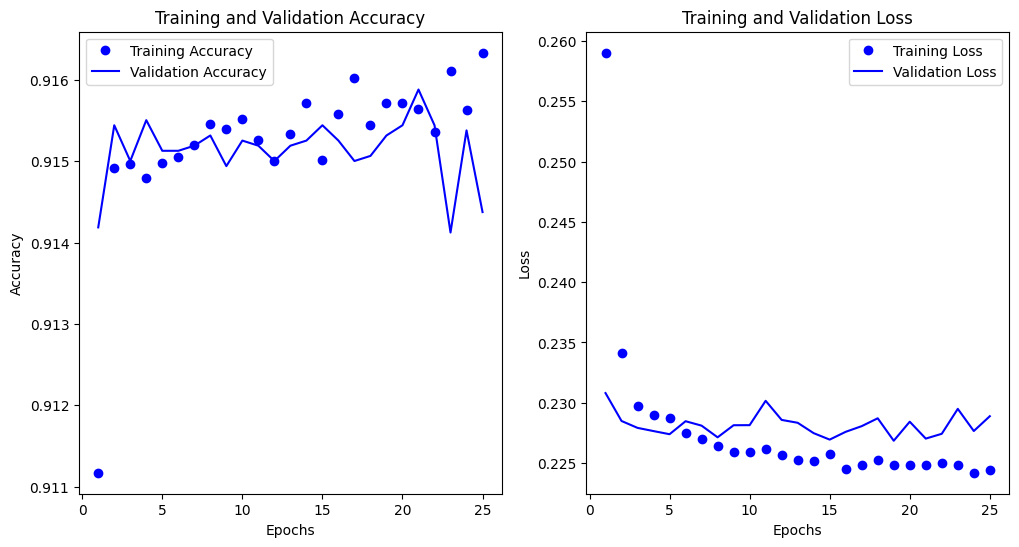

In [ ]:
import matplotlib.pyplot as plt

# Access the history object returned by the model.fit() method
history_dict = history.history

# Extract the training and validation accuracy values
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Extract the training and validation loss values
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

498/498 [==============================] - 3s 5ms/step - loss: 0.2289 - accuracy: 0.9144
Test accuracy: 0.914375364780426


498/498 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9144


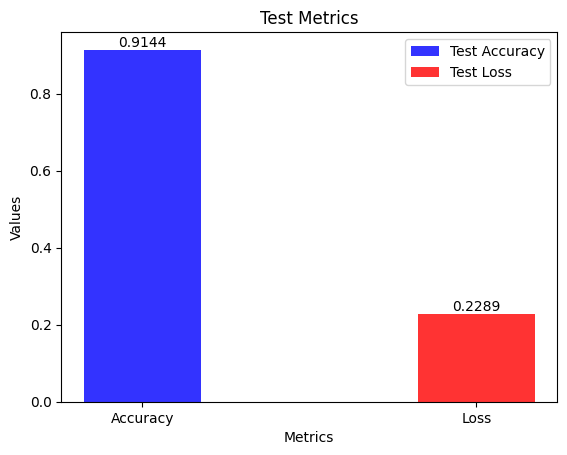

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model and get the test loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

# Create a bar chart for test accuracy and loss
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

# Bar chart for accuracy
rects1 = ax.bar(0, test_acc, bar_width, alpha=opacity, color='b', label='Test Accuracy')

# Bar chart for loss
rects2 = ax.bar(1, test_loss, bar_width, alpha=opacity, color='r', label='Test Loss')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Test Metrics')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Accuracy', 'Loss'])
ax.legend()

# Display the values on top of the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


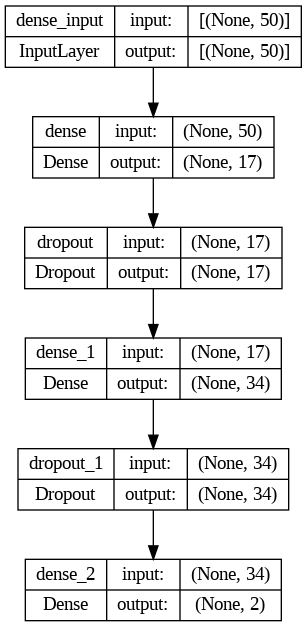

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is already defined
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
from IPython.display import Image
Image('model_plot.png')

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14562     0]
 [ 1368     0]]


0.9141242937853107

# Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14257   305]
 [ 1227   141]]


0.9038292529817954

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11110  3452]
 [  383   985]]


0.7592592592592593

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14429   133]
 [ 1229   139]]


0.9145009416195857

# Kernel Svm

In [ ]:
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ksvm_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14486    76]
 [ 1297    71]]


0.9138104205900817

# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14213   349]
 [ 1156   212]]


0.9055241682360327

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dtc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13412  1150]
 [ 1030   338]]


0.8631512868801005

# FL Results

##Client 1

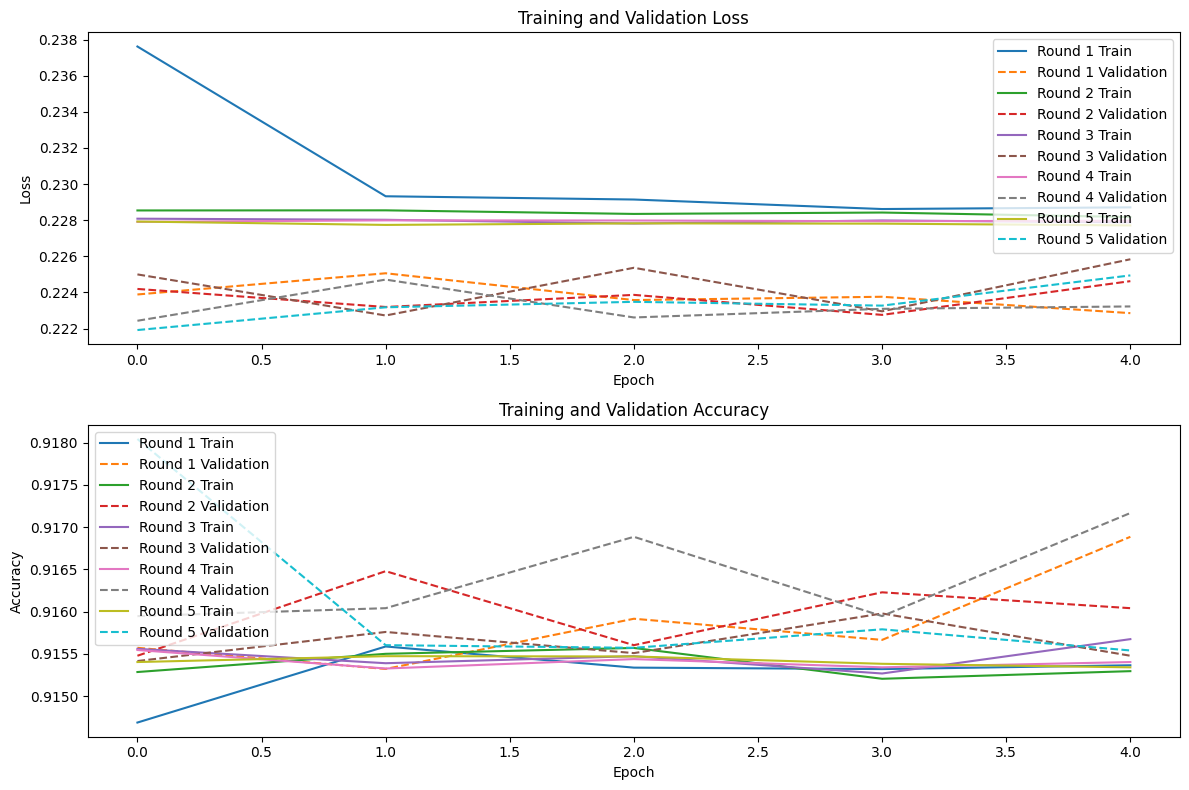

In [55]:
import matplotlib.pyplot as plt

# Extracting training history for each round
train_losses = [
    [0.2376183420419693, 0.22932526469230652, 0.22914515435695648, 0.22861845791339874, 0.22871120274066925],
    [0.22854019701480865, 0.22854605317115784, 0.22834758460521698, 0.2284243255853653, 0.22817575931549072],
    [0.22808381915092468, 0.22802306711673737, 0.2278164178133011, 0.22798621654510498, 0.2278827428817749],
    [0.22790983319282532, 0.22799061238765717, 0.2279832512140274, 0.22794443368911743, 0.22796984016895294],
    [0.22792543470859528, 0.2277390956878662, 0.227824866771698, 0.22780901193618774, 0.2277115136384964]
]

val_losses = [
    [0.22388671338558197, 0.22506090998649597, 0.22357724606990814, 0.22376039624214172, 0.22285324335098267],
    [0.22419345378875732, 0.22319400310516357, 0.22386477887630463, 0.22275708615779877, 0.22462515532970428],
    [0.2249981164932251, 0.22272293269634247, 0.2253647893667221, 0.22295507788658142, 0.22583653032779694],
    [0.22243152558803558, 0.2247106432914734, 0.22261399030685425, 0.2230915129184723, 0.22322405874729156],
    [0.22191709280014038, 0.2231767177581787, 0.2234792858362198, 0.2232697457075119, 0.22494317591190338]
]

train_accuracies = [
    [0.914688229560852, 0.9155881404876709, 0.9153379797935486, 0.915320634841919, 0.9153657555580139],
    [0.9152858853340149, 0.9155012965202332, 0.9155707955360413, 0.9152059555053711, 0.9152962565422058],
    [0.9155603647232056, 0.9153900742530823, 0.915473461151123, 0.9152684807777405, 0.9156749844551086],
    [0.9155464172363281, 0.9153275489807129, 0.915438711643219, 0.9153414368629456, 0.9154040217399597],
    [0.9154040217399597, 0.915473461151123, 0.9154700040817261, 0.9153831601142883, 0.9153414368629456]
]

val_accuracies = [
    [0.9155722260475159, 0.9153220653533936, 0.9159162044525146, 0.9156660437583923, 0.9168855547904968],
    [0.9154784083366394, 0.9164790511131287, 0.915603518486023, 0.9162288904190063, 0.9160412549972534],
    [0.91541588306427, 0.9157598614692688, 0.9155097007751465, 0.915978729724884, 0.9154784083366394],
    [0.9159474968910217, 0.9160412549972534, 0.9168855547904968, 0.9159474968910217, 0.9171670079231262],
    [0.9180425405502319, 0.915603518486023, 0.9155722260475159, 0.9157910943031311, 0.9155409336090088]
]

# Plotting training and validation losses
plt.figure(figsize=(12, 8))

# Loss plot
plt.subplot(2, 1, 1)
for i in range(5):
    plt.plot(train_losses[i], label=f'Round {i+1} Train')
    plt.plot(val_losses[i], label=f'Round {i+1} Validation', linestyle='dashed')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(2, 1, 2)
for i in range(5):
    plt.plot(train_accuracies[i], label=f'Round {i+1} Train')
    plt.plot(val_accuracies[i], label=f'Round {i+1} Validation', linestyle='dashed')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Client 2

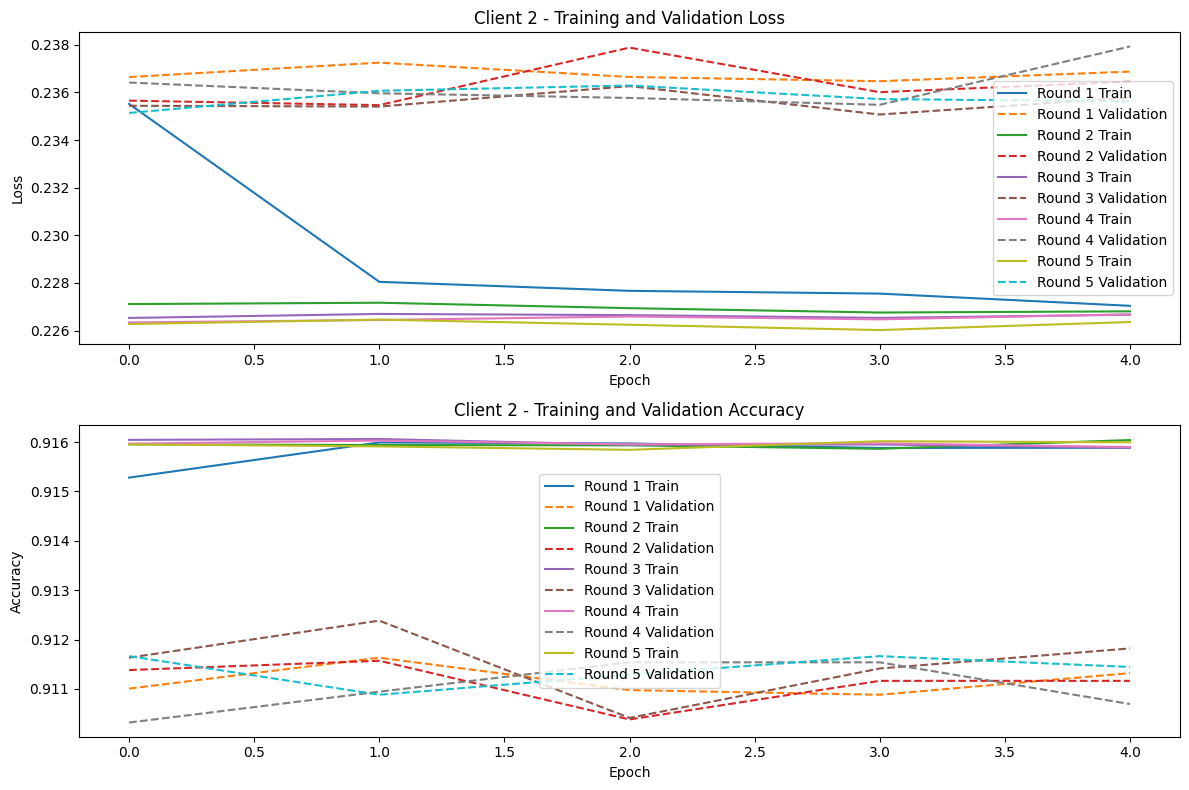

In [56]:
import matplotlib.pyplot as plt

# Extracting training history for each round (Client 2)
client2_train_losses = [
    [0.23551708459854126, 0.22804541885852814, 0.22766709327697754, 0.22755123674869537, 0.22703811526298523],
    [0.2271115928888321, 0.22716756165027618, 0.22693997621536255, 0.22675621509552002, 0.22680629789829254],
    [0.22652830183506012, 0.22669748961925507, 0.22664766013622284, 0.22653032839298248, 0.22666402161121368],
    [0.22633902728557587, 0.22644339501857758, 0.22658933699131012, 0.2264695018529892, 0.22668223083019257],
    [0.22627295553684235, 0.22645901143550873, 0.2262425720691681, 0.22602055966854095, 0.22635778784751892]
]

client2_val_losses = [
    [0.23664484918117523, 0.23725014925003052, 0.23664921522140503, 0.2364709973335266, 0.23687432706356049],
    [0.23565497994422913, 0.2354656457901001, 0.23788262903690338, 0.2360098958015442, 0.23645168542861938],
    [0.23544029891490936, 0.2354043871164322, 0.23626424372196198, 0.23507197201251984, 0.2357804775238037],
    [0.23641471564769745, 0.23596350848674774, 0.2357681691646576, 0.2354799062013626, 0.23792794346809387],
    [0.23513810336589813, 0.2360689491033554, 0.23629075288772583, 0.23572033643722534, 0.23562470078468323]
]

client2_train_accuracies = [
    [0.9152789115905762, 0.9159911870956421, 0.9159703254699707, 0.9158799648284912, 0.915883481502533],
    [0.9159529805183411, 0.9159390330314636, 0.9159321188926697, 0.9158626198768616, 0.9160398244857788],
    [0.9160432815551758, 0.9160606861114502, 0.9159460067749023, 0.9159494638442993, 0.915883481502533],
    [0.9159668684005737, 0.9160293936729431, 0.9159529805183411, 0.9159737825393677, 0.9158973693847656],
    [0.9159529805183411, 0.9159112572669983, 0.9158417582511902, 0.9160155057907104, 0.9159946441650391]
]

client2_val_accuracies = [
    [0.9110068678855896, 0.9116322994232178, 0.9109756350517273, 0.9108818173408508, 0.9113195538520813],
    [0.9113821387290955, 0.9115697145462036, 0.9103814959526062, 0.9111632108688354, 0.9111632108688354],
    [0.9116322994232178, 0.9123827219009399, 0.9104127287864685, 0.9114133715629578, 0.9118198752403259],
    [0.9103189706802368, 0.9109443426132202, 0.9115384817123413, 0.9115384817123413, 0.9106941819190979],
    [0.9116635322570801, 0.9108818173408508, 0.911288321018219, 0.9116635322570801, 0.9114446640014648]
]

# Plotting training and validation losses for Client 2
plt.figure(figsize=(12, 8))

# Loss plot
plt.subplot(2, 1, 1)
for i in range(5):
    plt.plot(client2_train_losses[i], label=f'Round {i+1} Train')
    plt.plot(client2_val_losses[i], label=f'Round {i+1} Validation', linestyle='dashed')

plt.title('Client 2 - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(2, 1, 2)
for i in range(5):
    plt.plot(client2_train_accuracies[i], label=f'Round {i+1} Train')
    plt.plot(client2_val_accuracies[i], label=f'Round {i+1} Validation', linestyle='dashed')

plt.title('Client 2 - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


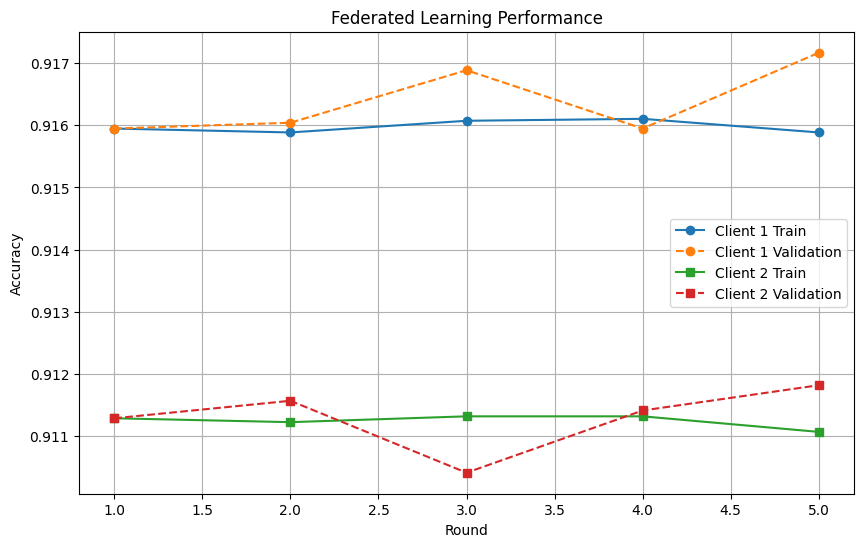

In [54]:
import matplotlib.pyplot as plt

# Client 1 training and validation accuracy
client1_train_accuracy = [0.9159474968910217, 0.9158849120140076, 0.9160725474357605, 0.9161038398742676, 0.9158849120140076]
client1_val_accuracy = [0.9159474968910217, 0.9160412549972534, 0.9168855547904968, 0.9159474968910217, 0.9171670079231262]

# Client 2 training and validation accuracy
client2_train_accuracy = [0.911288321018219, 0.9112257957458496, 0.9113195538520813, 0.9113195538520813, 0.911069393157959]
client2_val_accuracy = [0.911288321018219, 0.9115697145462036, 0.9104127287864685, 0.9114133715629578, 0.9118198752403259]

# Number of rounds
rounds = list(range(1, 6))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(rounds, client1_train_accuracy, marker='o', linestyle='-', label='Client 1 Train')
plt.plot(rounds, client1_val_accuracy, marker='o', linestyle='--', label='Client 1 Validation')

plt.plot(rounds, client2_train_accuracy, marker='s', linestyle='-', label='Client 2 Train')
plt.plot(rounds, client2_val_accuracy, marker='s', linestyle='--', label='Client 2 Validation')

plt.title('Federated Learning Performance')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

##Server Side

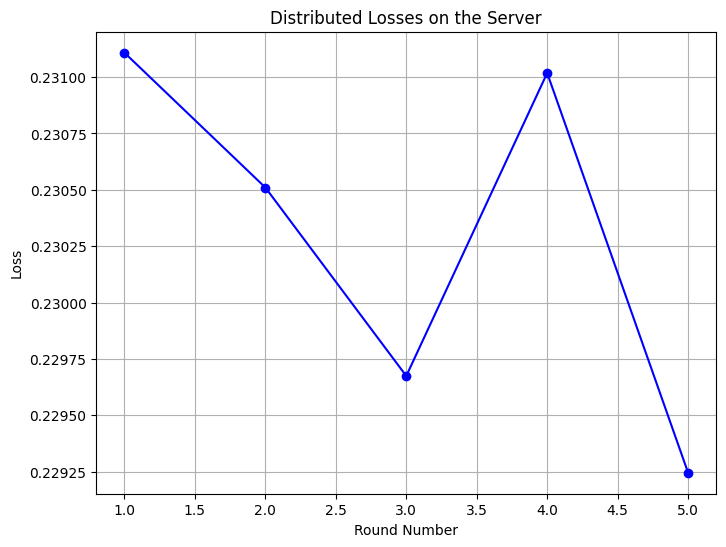

In [57]:
import matplotlib.pyplot as plt

# Losses distributed for each round on the server
losses_distributed = [(1, 0.231108158826828), (2, 0.2305101528763771), (3, 0.2296743243932724), (4, 0.2310180962085724), (5, 0.2292451709508896)]

# Extracting round numbers and corresponding losses
round_numbers, distributed_losses = zip(*losses_distributed)

# Plotting distributed losses on the server
plt.figure(figsize=(8, 6))
plt.plot(round_numbers, distributed_losses, marker='o', linestyle='-', color='b')
plt.title('Distributed Losses on the Server')
plt.xlabel('Round Number')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
